# September 18

No homework this week; y'all have worked hard enough. This week, we'll be moving on to plotting. We'll be looking at how to build graphical summaries of data, using a library called plotnine.

Python has powerful built-in plotting capabilities such as matplotlib, but for this episode, we will be using the plotnine package, which facilitates the creation of highly-informative plots of structured data based on the R implementation of ggplot2 and The Grammar of Graphics by Leland Wilkinson. The plotnine package is built on top of Matplotlib and interacts well with Pandas.

Just as with the other packages, plotnine need to be imported. It is good practice to not just load an entire package such as from plotnine import *, but to use an abbreviation as we used pd for Pandas:

In [1]:
import plotnine as p9

From now on, the functions of plotnine are available using p9. For the exercise, we will use the surveys.csv data set, with the NA values removed

In [2]:
import pandas as pd

surveys_complete = pd.read_csv('../data/surveys.csv')
surveys_complete = surveys_complete.dropna()


# Plotting with plotnine

The plotnine package (cfr. other packages conform The Grammar of Graphics) supports the creation of complex plots from data in a dataframe. It uses default settings, which help creating publication quality plots with a minimal amount of settings and tweaking.

plotnine graphics are built step by step by adding new elements adding different elements on top of each other using the + operator. Putting the individual steps together in brackets () provides Python-compatible syntax.

To build a plotnine graphic we need to:

- Bind the plot to a specific data frame using the data argument:


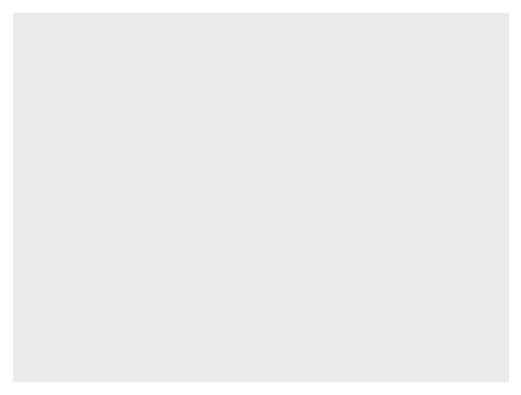

<ggplot: (8765961800719)>

In [3]:
(p9.ggplot(data=surveys_complete))

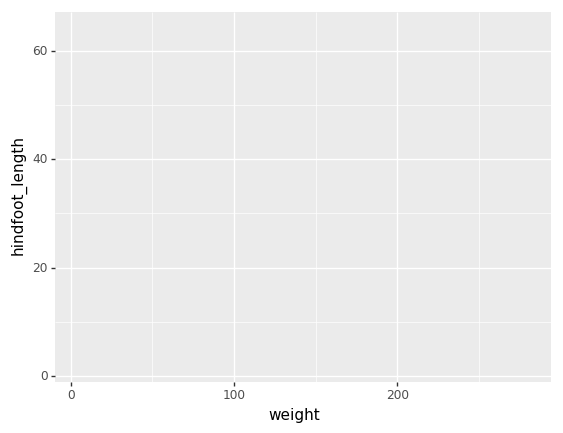

<ggplot: (-9223363270892973140)>

In [4]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length')))


The most important aes mappings are: x, y, alpha, color, colour, fill, linetype, shape, size and stroke.

- Still no specific data is plotted, as we have to define what kind of geometry will be used for the plot. The most straightforward is probably using points. Points is one of the geoms options, the graphical representation of the data in the plot. Others are lines, bars,… To add a geom to the plot use + operator:


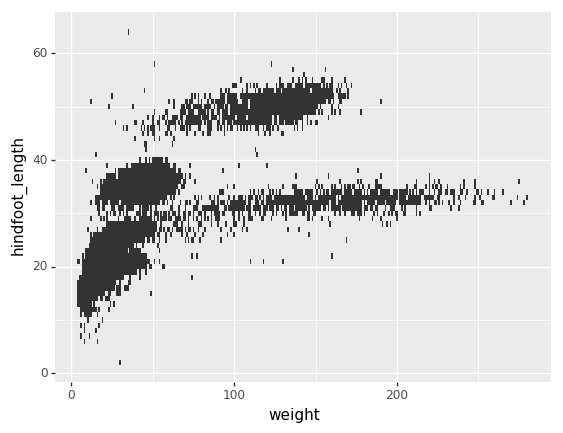

<ggplot: (8765958934066)>

In [18]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_tile()
)


The `+` in the `plotnine` package is particularly useful because it allows you to modify existing plotnine objects. This means you can easily set up plot templates and conveniently explore different types of plots, so the above plot can also be generated with code like this:

In [15]:
help(p9.geom_point)

Help on class geom_point in module plotnine.geoms.geom_point:

class geom_point(plotnine.geoms.geom.geom)
 |  Plot points (Scatter plot)
 |  
 |  
 |  .. rubric:: Usage
 |  
 |  ::
 |  
 |      geom_point(mapping=None, data=None, stat='identity', position='identity',
 |                 na_rm=False, inherit_aes=True, show_legend=None, **kwargs)
 |  
 |  Only the ``mapping`` and ``data`` can be positional, the rest must
 |  be keyword arguments. ``**kwargs`` can be aesthetics (or parameters)
 |  used by the ``stat``.
 |  
 |  
 |  Parameters
 |  ----------
 |  mapping : aes, optional
 |      Aesthetic mappings created with :meth:`~plotnine.aes`. If specified and :py:`inherit.aes=True`, it is combined with the default mapping for the plot. You must supply mapping if there is no plot mapping.
 |      
 |      ========= =========
 |      Aesthetic Default value
 |      ========= =========
 |      **x**     
 |      **y**     
 |      alpha     :py:`1`
 |      color     :py:`'black'`
 |     

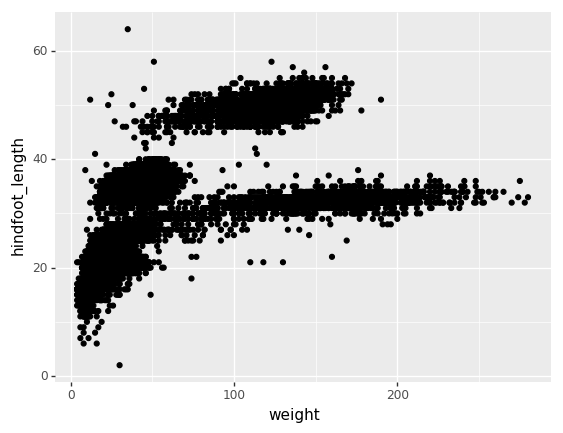

<ggplot: (8765958905590)>

In [19]:
# Create
surveys_plot = p9.ggplot(data=surveys_complete,
                         mapping=p9.aes(x='weight', y='hindfoot_length'))

# Draw the plot
surveys_plot + p9.geom_point()


Working on the surveys_complete data set, use the plot-id column to create a bar-plot that counts the number of records for each plot. (Check the documentation of the bar geometry to handle the counts)

In [20]:
help(p9.geom_bar())

Help on geom_bar in module plotnine.geoms.geom_bar object:

class geom_bar(plotnine.geoms.geom_rect.geom_rect)
 |  Bar plot
 |  
 |  
 |  .. rubric:: Usage
 |  
 |  ::
 |  
 |      geom_bar(mapping=None, data=None, stat='count', position='stack', na_rm=False,
 |               inherit_aes=True, show_legend=None, width=None, **kwargs)
 |  
 |  Only the ``mapping`` and ``data`` can be positional, the rest must
 |  be keyword arguments. ``**kwargs`` can be aesthetics (or parameters)
 |  used by the ``stat``.
 |  
 |  
 |  Parameters
 |  ----------
 |  mapping : aes, optional
 |      Aesthetic mappings created with :meth:`~plotnine.aes`. If specified and :py:`inherit.aes=True`, it is combined with the default mapping for the plot. You must supply mapping if there is no plot mapping.
 |      
 |      ========= =========
 |      Aesthetic Default value
 |      ========= =========
 |      **x**     
 |      **y**     
 |      alpha     :py:`1`
 |      color     :py:`None`
 |      fill      :py

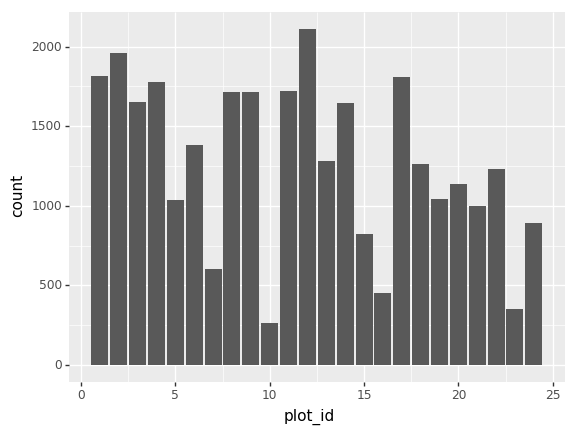

<ggplot: (8765958861204)>

In [25]:
#Answer here!
surveys_plot = p9.ggplot(data=surveys_complete,
                        mapping=p9.aes(x='plot_id'))
surveys_plot + p9.geom_bar()

- Anything you put in the `ggplot()` function can be seen by any geom layers that you add (i.e., these are universal plot settings). This includes the `x` and `y` axis you set up in `aes()`.
- You can also specify aesthetics for a given `geom` independently of the aesthetics defined globally in the `ggplot()` function.


# Building your plots iteratively

Building plots with `plotnine` is typically an iterative process. We start by defining the dataset we’ll use, lay the axes, and choose a geom. Hence, the data, `aes` and `geom-*` are the elementary elements of any graph:

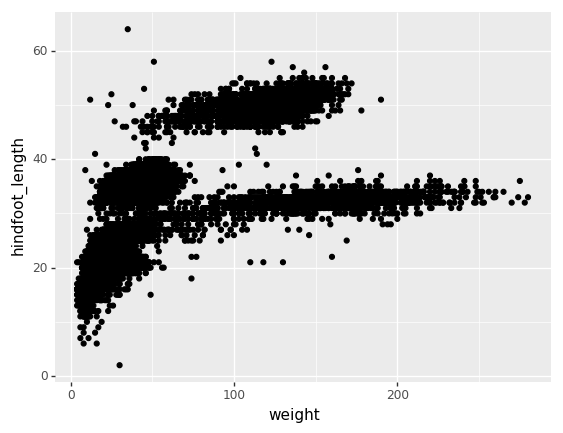

<ggplot: (8765958415652)>

In [26]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point()
)


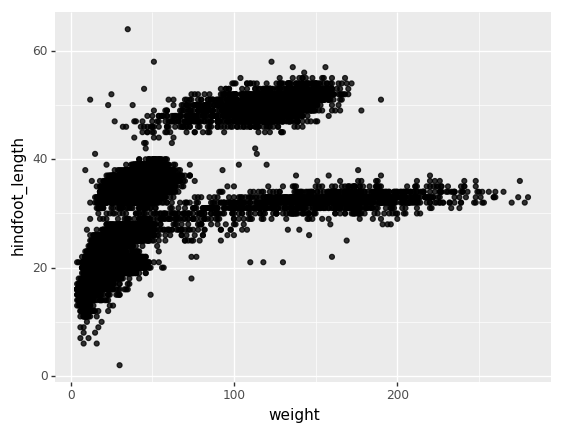

<ggplot: (-9223363270894462334)>

In [28]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point(alpha=0.8)
)


We can also add colors for all the points

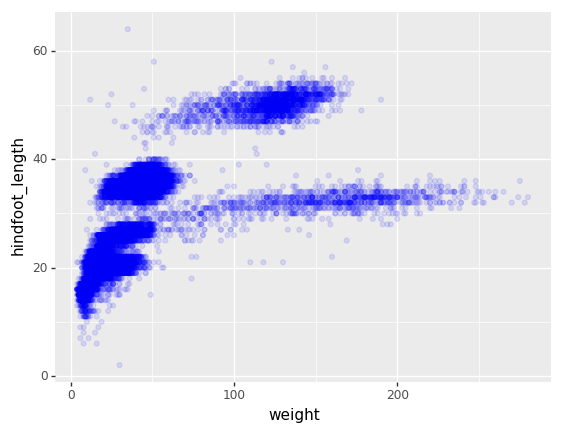

<ggplot: (8765960313492)>

In [29]:
surveys_plot = p9.ggplot(data=surveys_complete,
                         mapping=p9.aes(x='weight', y='hindfoot_length'))
               + p9.geom_point(alpha=0.1, color='blue')
)


Or to color each species in the plot differently, map the `species_id` column to the color aesthetic:

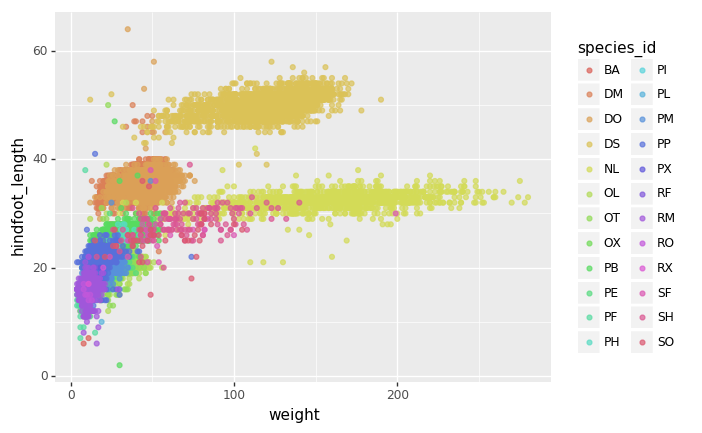

<ggplot: (-9223363270896585563)>

In [32]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.7)
)


Apart from the adaptations of the arguments and settings of the data, `aes` and `geom-*` elements, additional elements can be added as well, using the + operator:

- Changing the labels:


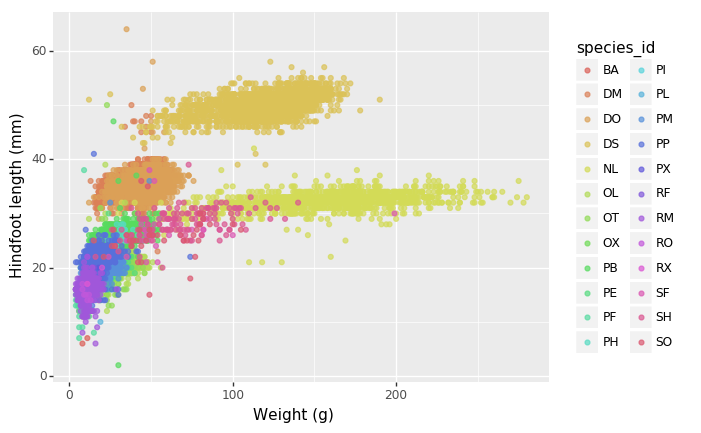

<ggplot: (8765961582554)>

In [37]:
surveys_plot = p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
surveys_plot = surveys_plot + p9.geom_point(alpha=0.7)
surveys_plot = surveys_plot + p9.xlab("Weight (g)")
surveys_plot = surveys_plot + p9.ylab("Hindfoot length (mm)")

surveys_plot



- Defining scale for colors, axes,… For example, a log-version of the x-axis could support the interpretation of the lower numbers:


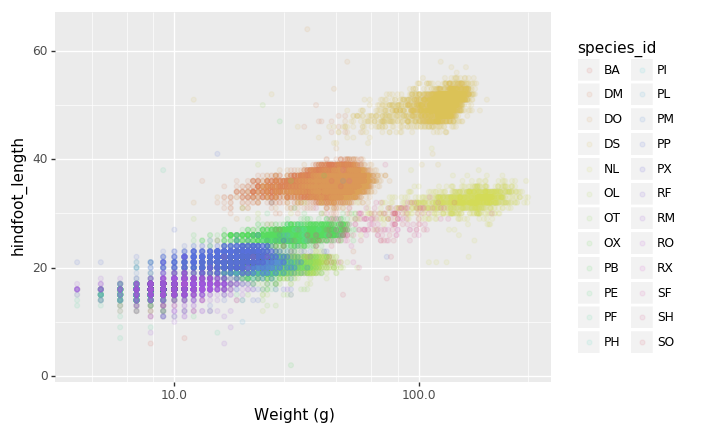

<ggplot: (-9223363270895894142)>

In [38]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("Weight (g)")
    + p9.scale_x_log10()
)


Changing the theme (`theme_*`) or some specific theming (theme) elements. Usually plots with white background look more readable when printed. We can set the background to white using the function `theme_bw()`.

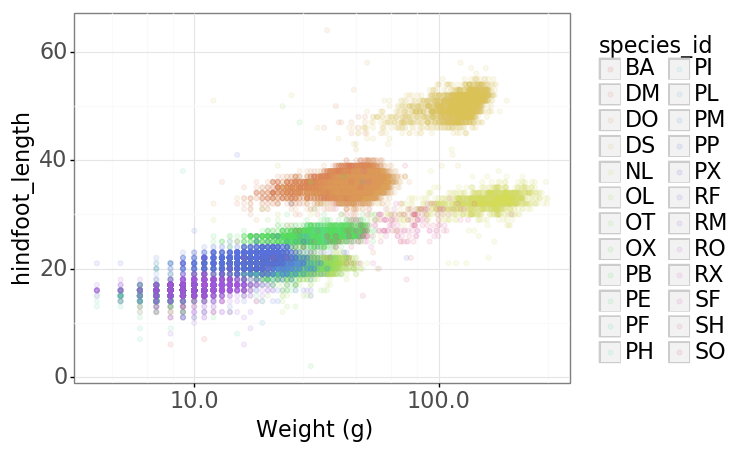

<ggplot: (-9223363270912673753)>

In [44]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("Weight (g)")
    + p9.scale_x_log10()
    + p9.theme_bw()
    + p9.theme(text=p9.element_text(size=16))
)


In [ ]:
help(p9.th)

# Challenge
Adapt the bar plot of the previous exercise by mapping the sex variable to the color fill of the bar chart. Change the scale of the color fill by providing the colors blue and orange manually (see API reference to find the appropriate function).

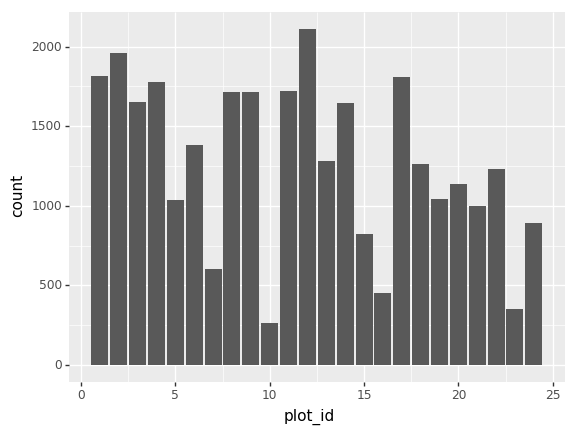

<ggplot: (8765958700776)>

In [51]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='plot_id',
                          fill='weight'))
    + p9.geom_bar()
    + p9.scale_fill_gradient(["blue", "red"])
)

# Plotting distributions

Visualizing distributions is a common task during data exploration and analysis. To visualize the distribution of weight within each `species_id` group, a boxplot can be used:

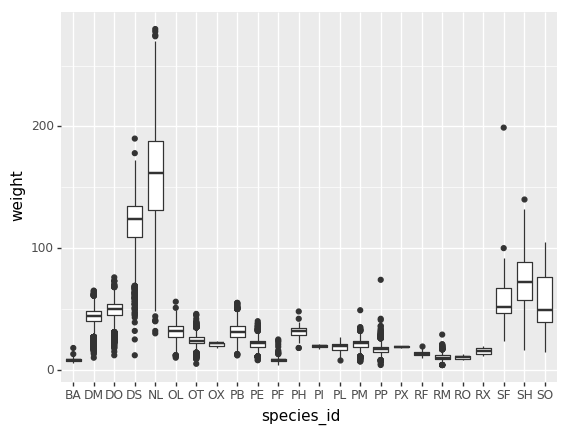

<ggplot: (-9223363270895899760)>

In [52]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
    + p9.geom_boxplot()
)


In [53]:
help(p9.geom_boxplot)

Help on class geom_boxplot in module plotnine.geoms.geom_boxplot:

class geom_boxplot(plotnine.geoms.geom.geom)
 |  Box and whiskers plot
 |  
 |  
 |  .. rubric:: Usage
 |  
 |  ::
 |  
 |      geom_boxplot(mapping=None, data=None, stat='boxplot', position='dodge',
 |                   na_rm=False, inherit_aes=True, show_legend=None,
 |                   outlier_color=None, notchwidth=0.5, varwidth=False, notch=False,
 |                   outlier_stroke=0.5, outlier_size=1.5, outlier_alpha=1, fatten=2,
 |                   outlier_shape='o', **kwargs)
 |  
 |  Only the ``mapping`` and ``data`` can be positional, the rest must
 |  be keyword arguments. ``**kwargs`` can be aesthetics (or parameters)
 |  used by the ``stat``.
 |  
 |  
 |  Parameters
 |  ----------
 |  mapping : aes, optional
 |      Aesthetic mappings created with :meth:`~plotnine.aes`. If specified and :py:`inherit.aes=True`, it is combined with the default mapping for the plot. You must supply mapping if there is no p

By adding points of the individual observations to the boxplot, we can have a better idea of the number of measurements and of their distribution:

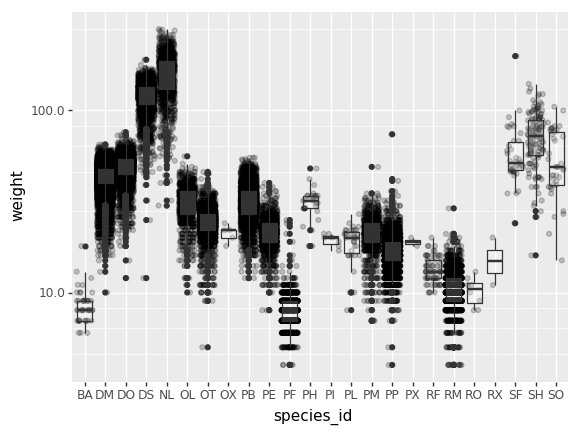

<ggplot: (8765958486841)>

In [63]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
    + p9.geom_jitter(alpha=0.2)
    + p9.scale_y_log10()
    + p9.geom_boxplot(alpha=0.2)
)


# Challenge

Boxplots are useful summaries, but hide the shape of the distribution. For example, if there is a bimodal distribution, this would not be observed with a boxplot. An alternative to the boxplot is the violin plot (sometimes known as a beanplot), where the shape (of the density of points) is drawn.

In many types of data, it is important to consider the scale of the observations. For example, it may be worth changing the scale of the axis to better distribute the observations in the space of the plot.

- Replace the box plot with a violin plot, see geom_violin()

/opt/tljh/user/lib/python3.6/site-packages/plotnine/stats/stat.py:315: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


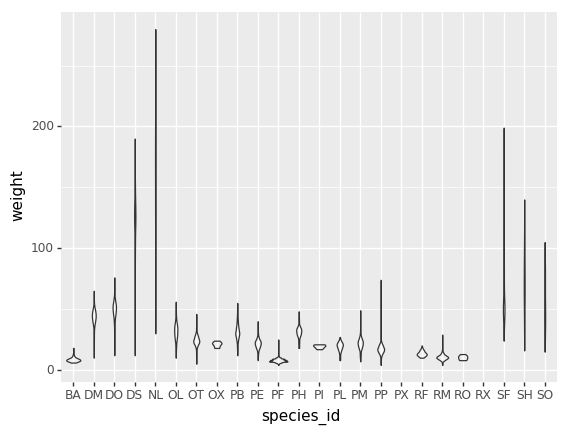

<ggplot: (-9223363270896600674)>

In [65]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
    + p9.geom_violin(alpha=0.2)
)


- Represent weight on the log10 scale, see scale_y_log10()

/opt/tljh/user/lib/python3.6/site-packages/plotnine/stats/stat.py:315: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


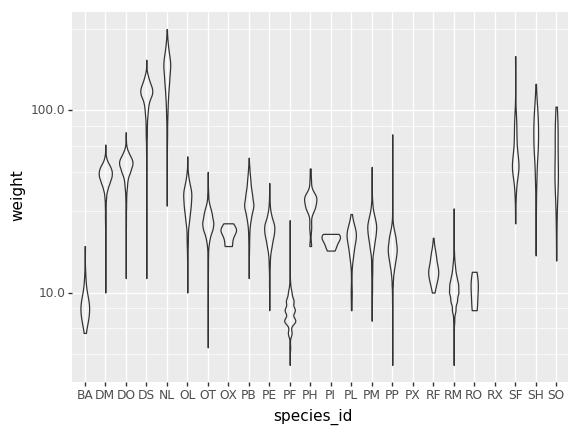

<ggplot: (8765958700797)>

In [66]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
    + p9.geom_violin(alpha=0.2)
    + p9.scale_y_log10()
)

- Add color to the datapoints on your boxplot according to the plot from which the sample was taken (plot_id)

/opt/tljh/user/lib/python3.6/site-packages/plotnine/stats/stat.py:315: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


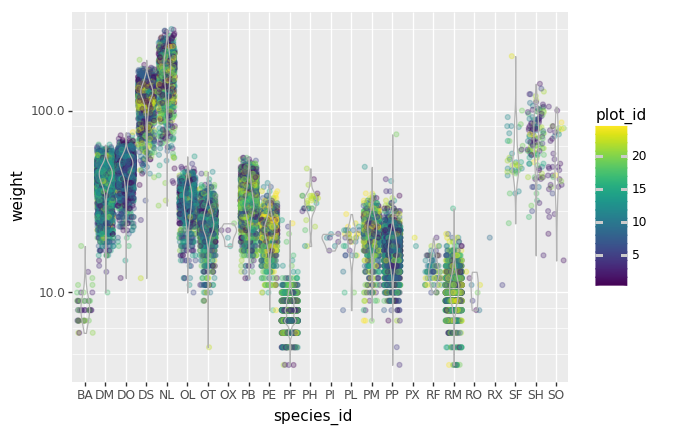

<ggplot: (8765956990991)>

In [71]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight',
                          color='plot_id'))
    + p9.geom_jitter(alpha=0.3)
    + p9.scale_y_log10()
    + p9.geom_violin(alpha=0, color="0.7")
)


Hint: Check the class for plot_id. By using factor() within the aes mapping of a variable, plotnine will handle the values as category values.

# Plotting time series data

Let’s calculate number of counts per year for each species. To do that we need to group data first and count the species (`species_id`) within each group.



In [72]:
yearly_counts = surveys_complete.groupby(['year', 'species_id'])['species_id'].count()
yearly_counts


year  species_id
1977  DM            181
      DO             12
      DS             29
      OL              1
      OX              2
      PE              2
      PF             22
      PP              3
      RM              2
1978  DM            336
      DO             21
      DS            272
      NL             23
      OL             35
      OT             45
      PE             12
      PF             33
      PM              2
      PP             23
      RM              2
      SH              1
1979  DM            183
      DO             28
      DS            183
      NL             30
      OL             43
      OT             63
      PE             16
      PF             16
      PM              6
                   ... 
2000  PP            368
      RM             15
      SH              7
2001  DM            292
      DO             77
      NL             44
      OT            153
      PB            520
      PE             35
      PF             26

When checking the result of the previous calculation, we actually have both the `year` and the `species_id` as a row index. We can reset this index to use both as column variable:

In [73]:
yearly_counts = yearly_counts.reset_index(name='counts')
yearly_counts


,year,species_id,counts
0,1977,DM,181
1,1977,DO,12
2,1977,DS,29
3,1977,OL,1
4,1977,OX,2
5,1977,PE,2
6,1977,PF,22
7,1977,PP,3
8,1977,RM,2
9,1978,DM,336


Timelapse data can be visualised as a line plot (`geom_line`) with years on x axis and counts on the y axis.

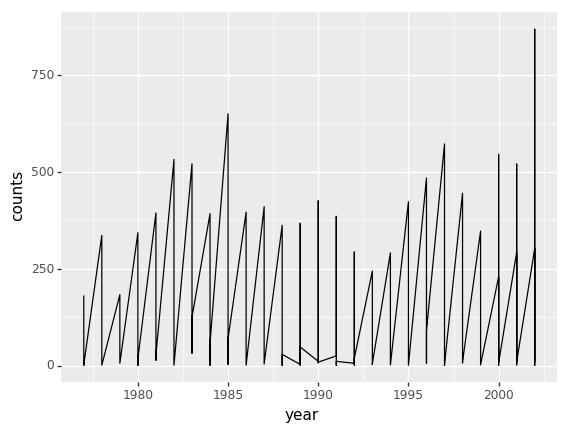

<ggplot: (-9223363270897411398)>

In [74]:
(p9.ggplot(data=yearly_counts,
           mapping=p9.aes(x='year',
                          y='counts'))
    + p9.geom_line()
)


Unfortunately this does not work, because we plot data for all the species together. We need to tell plotnine to draw a line for each species by modifying the aesthetic function and map the species_id to the color:

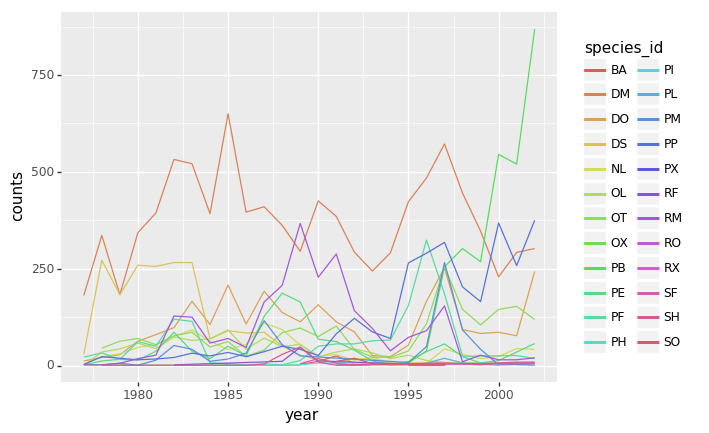

<ggplot: (-9223363270895894205)>

In [77]:
(p9.ggplot(data=yearly_counts,
           mapping=p9.aes(x='year',
                          y='counts',
                          color='species_id'))
    + p9.geom_line()
)


# Faceting

As any other library supporting the Grammar of Graphics, `plotnine` has a special technique called faceting that allows to split one plot into multiple plots based on a factor variable included in the dataset.

Consider our scatter plot of the `weight` versus the `hindfoot_length` from the previous sections:

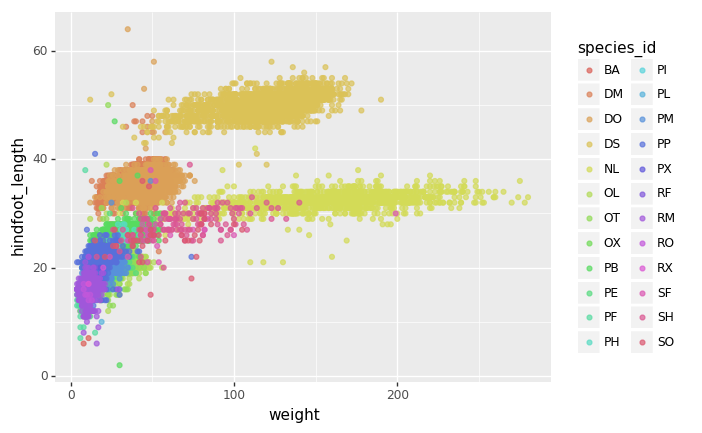

<ggplot: (-9223363270897166357)>

In [79]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.7)
)


We can now keep the same code and at the `facet_wrap` on a chosen variable to split out the graph and make a separate graph for each of the groups in that variable. As an example, use `sex`:

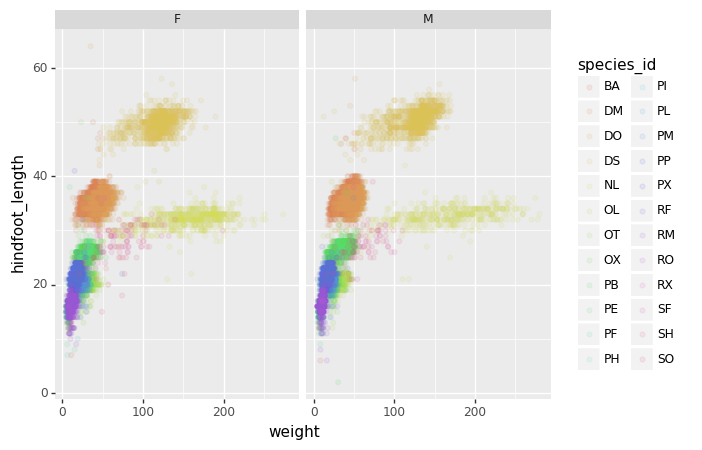

<ggplot: (8765957639225)>

In [80]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap("sex")
)


We can apply the same concept on any of the available categorical variables:

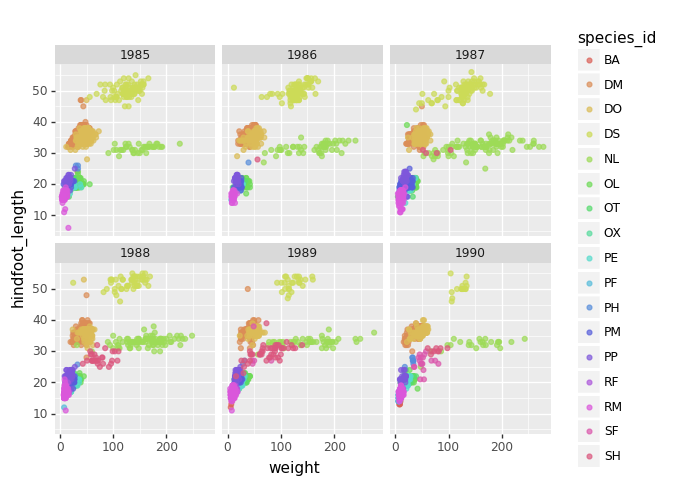

<ggplot: (-9223363270912777640)>

In [84]:
plot_df = surveys_complete[(surveys_complete.year >= 1985) & (surveys_complete.year <= 1990)]

(p9.ggplot(data=plot_df,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.7)
    + p9.facet_wrap("year")
)


The `facet_wrap` geometry extracts plots into an arbitrary number of dimensions to allow them to cleanly fit on one page. On the other hand, the `facet_grid` geometry allows you to explicitly specify how you want your plots to be arranged via formula notation (rows ~ columns; a . can be used as a placeholder that indicates only one row or column).

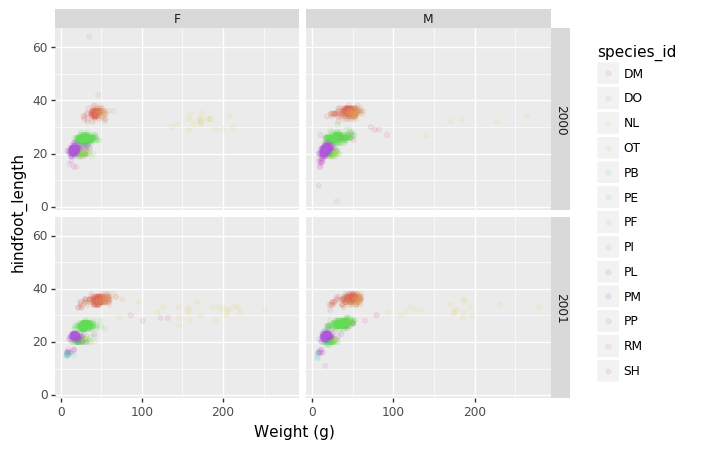

<ggplot: (-9223363270894608170)>

In [87]:
# only selecte the years of interest
survey_2000 = surveys_complete[surveys_complete["year"].isin([2000, 2001])]

(p9.ggplot(data=survey_2000,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_grid("year ~ sex")
    + p9.xlab("Weight (g)")
)


# Challenge 

- Create a separate plot for each of the species that depicts how the average weight of the species changes through the years.

/opt/tljh/user/lib/python3.6/site-packages/plotnine/geoms/geom_path.py:81: UserWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  warn("geom_path: Each group consist of only one "


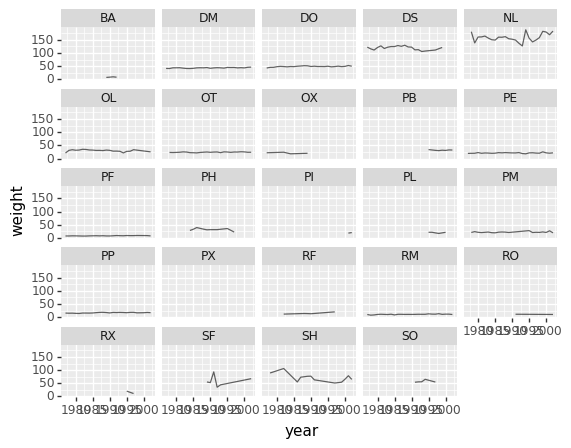

<ggplot: (-9223363270896695047)>

In [99]:
yearly_weight = surveys_complete.groupby(['year', 'species_id'])['weight'].mean()
yearly_weight = yearly_weight.reset_index(name='weight')

(p9.ggplot(data=yearly_weight,
           mapping=p9.aes(x='year',
                          y='weight'))
    + p9.geom_line(alpha=0.6)
    + p9.facet_wrap("species_id")
)

- Based on the previous exercise, visually compare how the weights of male and females has changed through time by creating a separate plot for each sex and an individual color assigned to each `species_id`

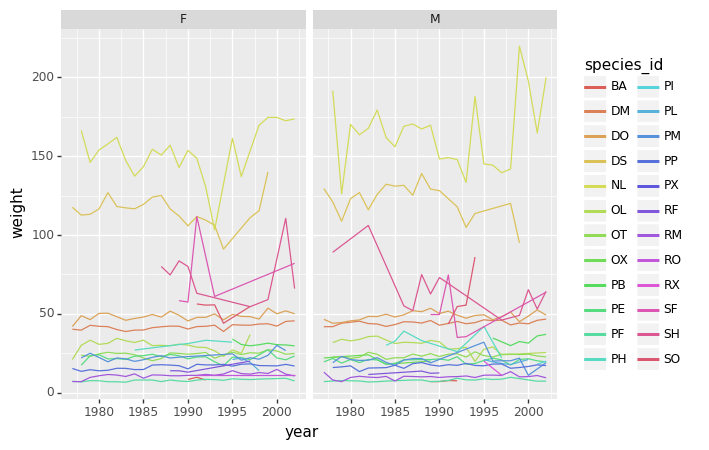

<ggplot: (-9223363270897603854)>

In [89]:
yearly_weight = surveys_complete.groupby(['year', 'species_id', 'sex'])['weight'].mean().reset_index()

(p9.ggplot(data=yearly_weight, mapping=p9.aes(x='year', y='weight', color='species_id')) 
 + p9.geom_line() + p9.facet_wrap("sex") )

# Further customization

As the syntax of plotnine follows the original R package `ggplot2`, the documentation of `ggplot2` can provide information and inspiration to customize graphs. Take a look at the `ggplot2` cheat sheet, and think of ways to improve the plot. 

The theming options provide a rich set of visual adaptations. Consider the following example of a bar plot with the counts per year.

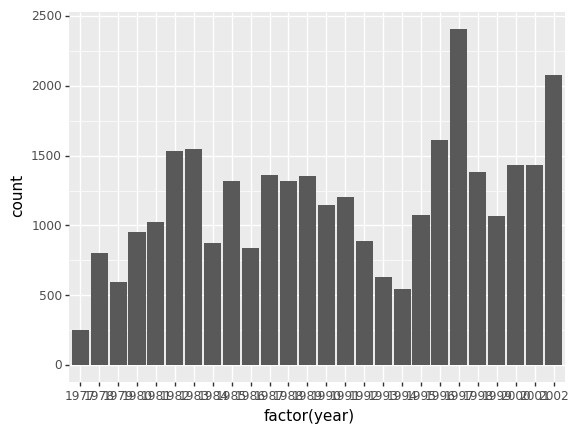

<ggplot: (8774678666181)>

In [3]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
)


Notice that we use the year here as a categorical variable by using the `factor` functionality. However, by doing so, we have the individual year labels overlapping with eachother. The theme functionality provides a way to rotate the text of the x-axis labels:

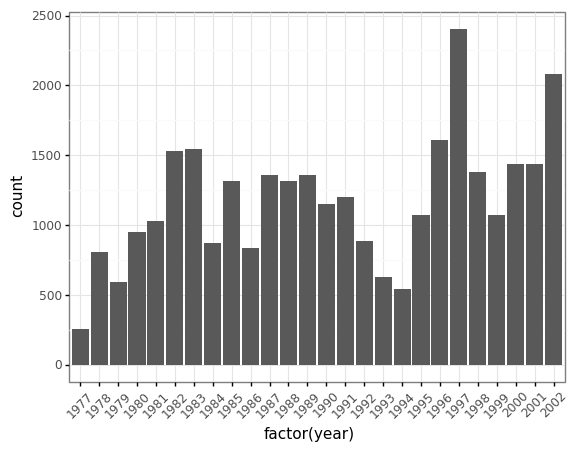

<ggplot: (8774678326781)>

In [7]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=45))
)


When you like a specific set of theme-customizations you created, you can save them as an object to easily apply them to other plots you may create:

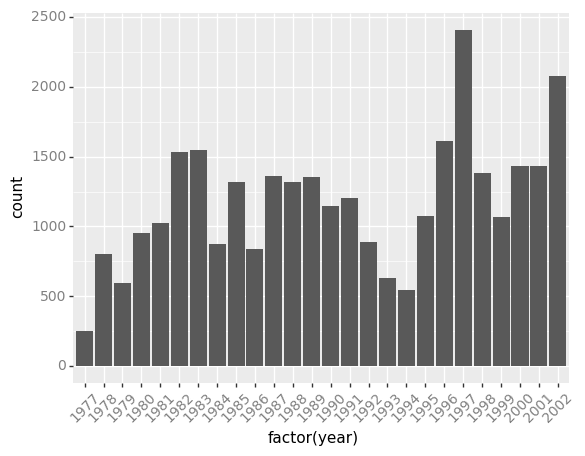

<ggplot: (8774678210838)>

In [10]:
my_custom_theme = p9.theme(axis_text_x = p9.element_text(color="grey", size=10,
                                                         angle=45, hjust=.5),
                           axis_text_y = p9.element_text(color="grey", size=10))

(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
    + my_custom_theme
)


# Challenge

Please take another five minutes to either improve one of the plots generated in this exercise or create a beautiful graph of your own.

Here are some ideas:

- See if you can change thickness of lines for the line plot .
- Can you find a way to change the name of the legend? What about its labels?
- Use a different color palette (see http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/)


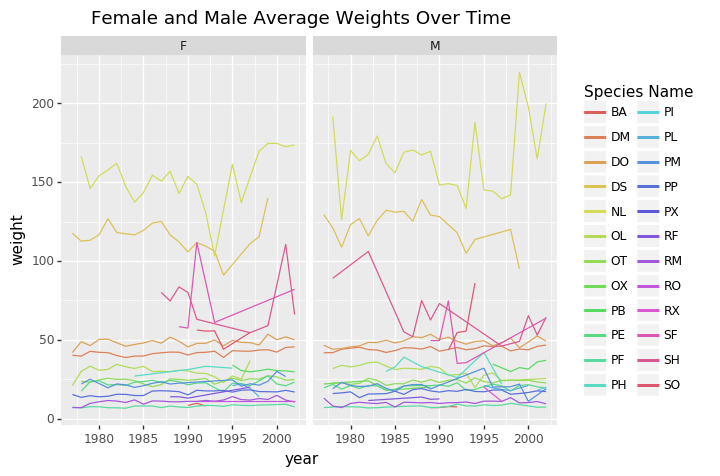

<ggplot: (8774677638692)>

In [17]:
yearly_weight = surveys_complete.groupby(['year', 'species_id', 'sex'])['weight'].mean().reset_index()
yearly_weight.columns = ['year', 'Species Name', 'sex', 'weight']

(p9.ggplot(data=yearly_weight, mapping=p9.aes(x='year', y='weight', color='Species Name')) 
 + p9.geom_line() + p9.facet_wrap("sex") + p9.ggtitle("Female and Male Average Weights Over Time"))



After creating your plot, you can save it to a file in your favourite format. You can easily change the dimension (and its resolution) of your plot by adjusting the appropriate arguments (width, height and dpi):

In [25]:
my_plot = (p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point(size=0.1)
)
my_plot.save("scatterplot.png", width=10, height=10, dpi=600, units = 'cm')


/opt/tljh/user/lib/python3.6/site-packages/plotnine/ggplot.py:708: UserWarning: Saving 10.0 x 10.0 cm image.
  from_inches(height, units), units))
/opt/tljh/user/lib/python3.6/site-packages/plotnine/ggplot.py:709: UserWarning: Filename: scatterplot.png
  warn('Filename: {}'.format(filename))


In [23]:
help(p9.geom_point)

Help on class geom_point in module plotnine.geoms.geom_point:

class geom_point(plotnine.geoms.geom.geom)
 |  Plot points (Scatter plot)
 |  
 |  
 |  .. rubric:: Usage
 |  
 |  ::
 |  
 |      geom_point(mapping=None, data=None, stat='identity', position='identity',
 |                 na_rm=False, inherit_aes=True, show_legend=None, **kwargs)
 |  
 |  Only the ``mapping`` and ``data`` can be positional, the rest must
 |  be keyword arguments. ``**kwargs`` can be aesthetics (or parameters)
 |  used by the ``stat``.
 |  
 |  
 |  Parameters
 |  ----------
 |  mapping : aes, optional
 |      Aesthetic mappings created with :meth:`~plotnine.aes`. If specified and :py:`inherit.aes=True`, it is combined with the default mapping for the plot. You must supply mapping if there is no plot mapping.
 |      
 |      ========= =========
 |      Aesthetic Default value
 |      ========= =========
 |      **x**     
 |      **y**     
 |      alpha     :py:`1`
 |      color     :py:`'black'`
 |     